<a href="https://colab.research.google.com/github/angelodilisi/Progetto-Fondamenti-ML/blob/main/Clusterizzazione_clienti_titolari_di_carta_di_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Soluzione

In [1]:
import pandas as pd

In [2]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"

In [3]:
df = pd.read_csv(DATASET_URL)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Visualizzo le informazioni del DataFrame per verificare la tipologiaa dei dati e la presenza di eventuali valori mancanti

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Procedo con la visualizzazione dei valori nulli e della loro distribuzione tra le diverse features.

In [6]:
df_copy=df.copy()

Creo una copia del dataframe per poter effettuare la preparazione dei dati senza modificare la base dati originaria

In [7]:
df_copy = df_copy.drop('CUST_ID', axis=1)
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Elimino la colonna relativa al CUST ID che al momento non è utile per l'analisi.

In [8]:
df_copy["MINIMUM_PAYMENTS"].fillna(df_copy["MINIMUM_PAYMENTS"].mean(0), inplace=True)

Il campo MINIMUM_PAYMENTS presenta 313 valori nulli. Si tratta del 3,40% del campione totale di 9000 entries. Vado a "riempire i dati" con la media dei valori presenti in colonna limitando cosi la perdita dei dati. Procedo allo stesso modo per la colonna CREDIT_LIMIT

In [9]:
df_copy["CREDIT_LIMIT"].fillna(df_copy['CREDIT_LIMIT'].mean(0), inplace=True)

In [10]:
df_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importo tutte le librerie e i moduli che andrò ad utilizzare nei prossimi passaggi

In [12]:
df_copy.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df_copy["MINIMUM_PAYMENTS"]=pd.to_numeric(df_copy["MINIMUM_PAYMENTS"], errors="coerce")

In [14]:
df_copy["CREDIT_LIMIT"]=pd.to_numeric(df_copy["CREDIT_LIMIT"], errors="coerce")

Converto MINIMUM_PAYMENTS e CREDIT_LIMIT in valori numerici perchè a seguito della conversione dei valori mancanti, il Dtype per le due features è diventato object

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [16]:
scaler = MinMaxScaler()
df_copy_normalized = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns, index=df_copy.index)

Procedo con la normalizzazione dei dati per facilitarne l'analisi

In [17]:
X=df_copy_normalized

In [53]:
plt.rcParams["figure.figsize"] = (12,6)
sns.set_theme(style="whitegrid")
RANDOM_SEED = 1

Importo il tema da seaborn per la visualizzazione dei grafici e imposto il RANDOM_SEED per garantire la riproducibilità del modello.

In [19]:

def plot_ssd_curve(data):

  ssd = {}
  for k in range(1, 10):
      kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED).fit(data)
      ssd[k] = kmeans.inertia_
  plt.figure()
  plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
  plt.xlabel("Numero di cluster", fontsize=16)
  plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
  plt.show()

In [ ]:
Imposto una funzione per l'utilizzo dell'Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

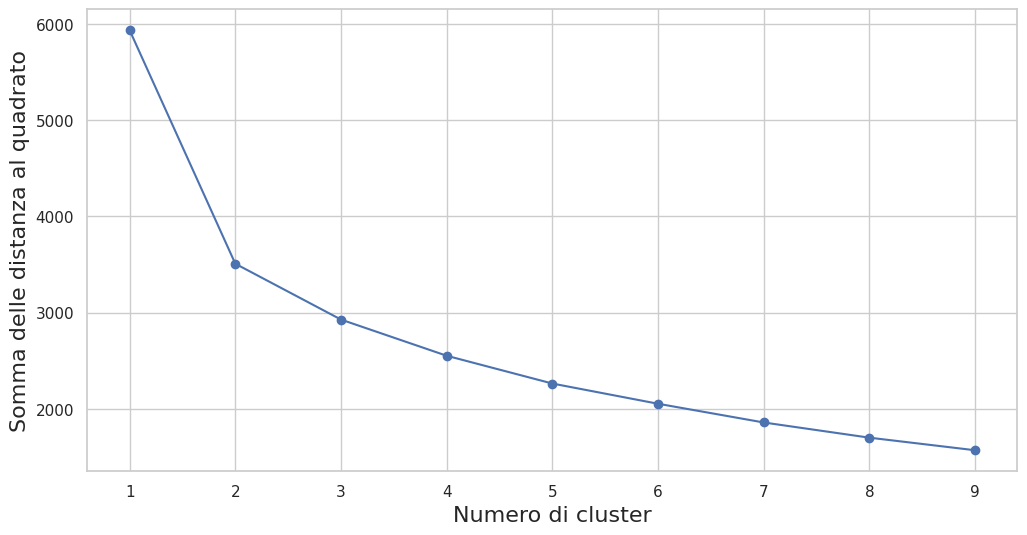

In [54]:
plot_ssd_curve(X)

Dal grafico individuo il numero di cluster a partire dal "gomito" della curva al punto 2 del range, quindi al successivo 3

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = RANDOM_SEED, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [22]:
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 0, ..., 2, 1, 0], dtype=int32)

Una volta che il modello K-means è stato addestrato, con il metodo predict assegno ciascun campione in X a uno dei cluster.
Ad X abbiamo assegnato il datafrance normalizzato e la funzione predict calcola la distanza di ciascun punto dai centroidi dei cluster e assegna il punto al cluster con il centroide più vicino.
y_pred è una variabile che memorizza le etichette di cluster previste per ciascun campione in X.
È un array di numeri interi in cui ciascun numero rappresenta il cluster al quale è assegnato il campione corrispondente.

In [23]:
centroids = kmeans.cluster_centers_

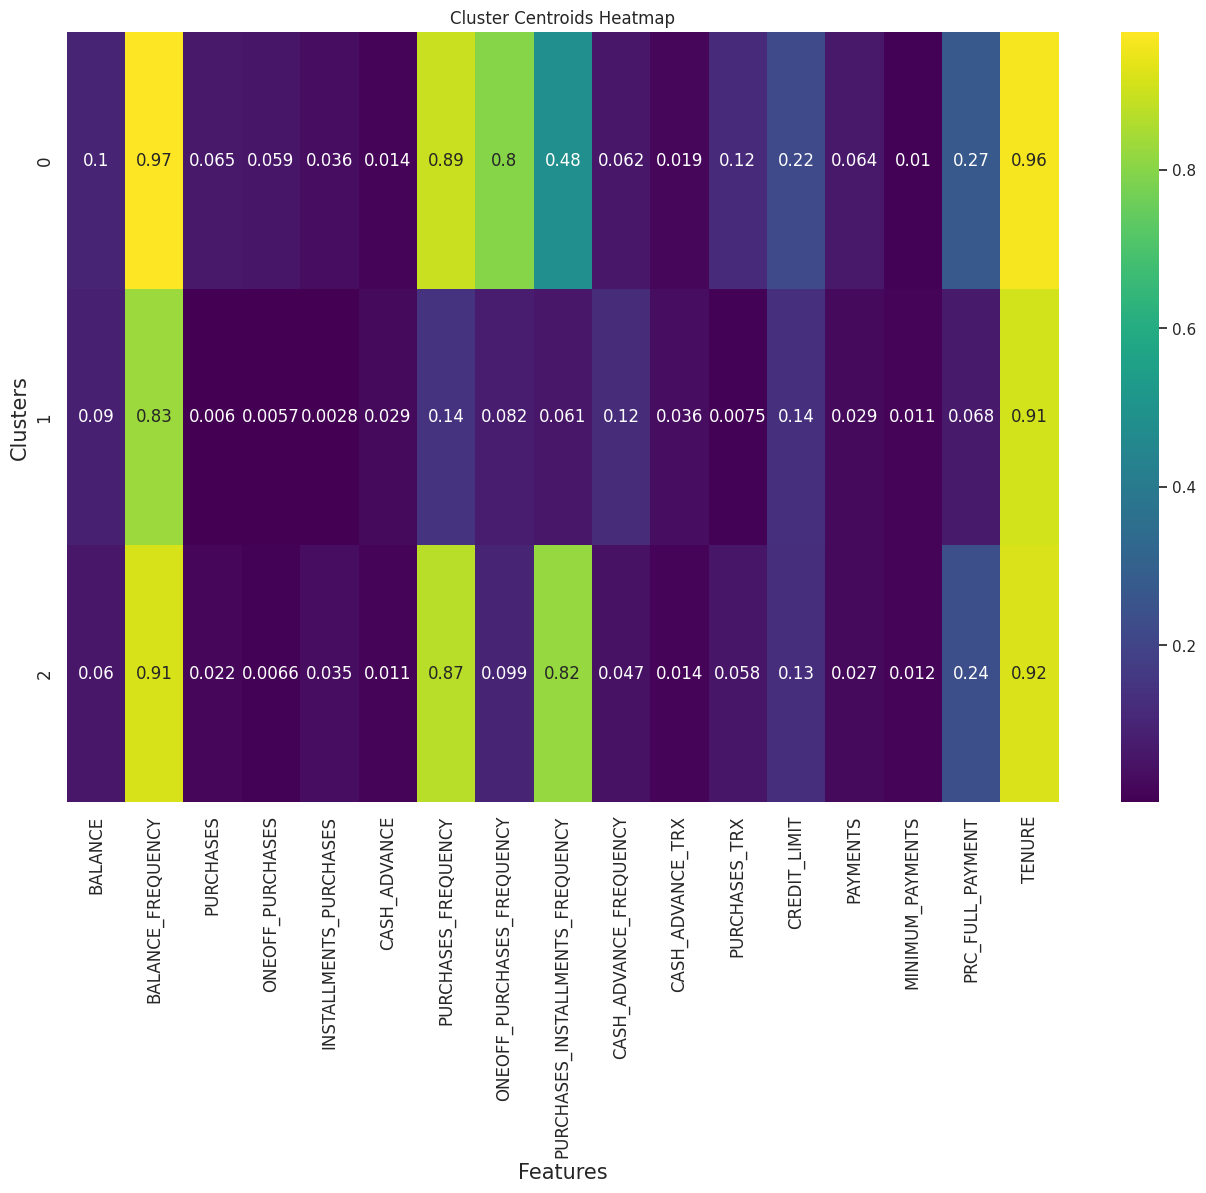

In [24]:
centroid_df = pd.DataFrame(centroids, columns=df_copy.columns)
plt.figure(figsize=(16, 10))
sns.heatmap(centroid_df, annot=True, cmap='viridis')
plt.title('Cluster Centroids Heatmap')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Clusters', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Credo una Heatmap per visualizzare le correlazioni tra le features e i cluster individuati

In [25]:
df_result = pd.DataFrame({
    "CUSTOMER_ID":df["CUST_ID"],
    "CUSTOMER_GROUP":y_pred+1,
})
df_result

,CUSTOMER_ID,CUSTOMER_GROUP
0,C10001,2
1,C10002,2
2,C10003,1
3,C10004,2
4,C10005,2
...,...,...
8945,C19186,3
8946,C19187,3
8947,C19188,3
8948,C19189,2


In [26]:
df_joined=df_result.join(df_copy)

In [27]:
df_joined

,CUSTOMER_ID,CUSTOMER_GROUP,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,2,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,2,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,1,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,2,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,2,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,3,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,3,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,3,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,2,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Assegno un indice alla colonna CUSTOMER_GROUP e unisco la colonna recuperando CUSTOMER_ID che ora torna ad essere rilevante. COn la funzione Join unisco i dataframe per ottenere una clusterizzazione di tutte le features.

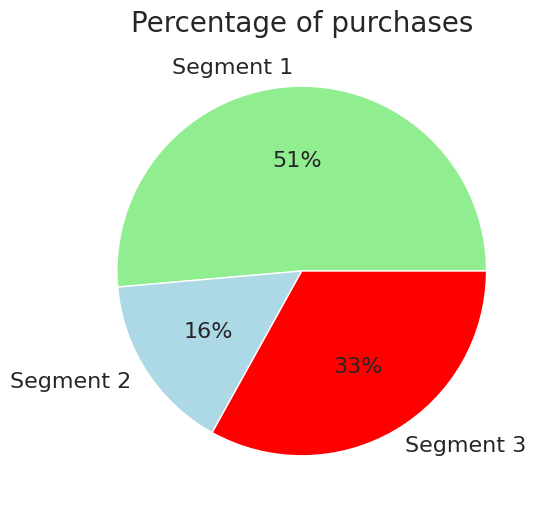

In [58]:
purchases = df_joined.groupby('CUSTOMER_GROUP')['PURCHASES'].sum()
categories = ['Segment 1', 'Segment 2', 'Segment 3']
pie_colors = ['lightgreen', 'lightblue', 'red']
plt.pie(purchases, labels=categories, colors=pie_colors, autopct='%1.0f%%', textprops={'fontsize': 16})
plt.title('Percentage of purchases', fontsize=20, loc='center')
plt.show()

Il grafico ci indica che i clienti appartenenti al Segment 1 hanno una media di acquisti più elevata rispetto agli altri segmenti.

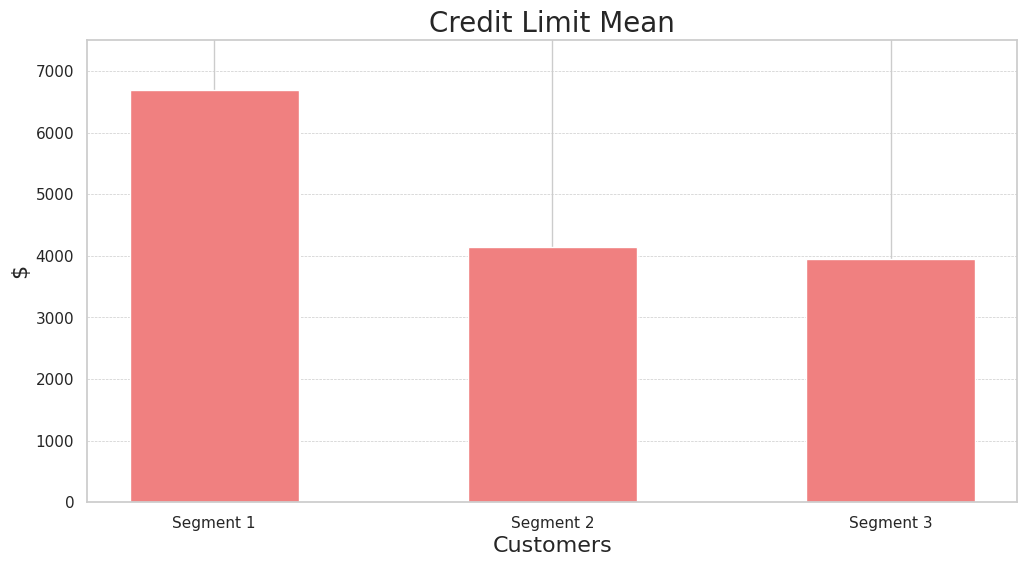

In [93]:
categories = ['Segment 1', 'Segment 2', 'Segment 3']
credit_limit = df_joined.groupby('CUSTOMER_GROUP')['CREDIT_LIMIT'].mean()
bar_width = 0.5
plt.bar(categories, credit_limit, bar_width, color='lightcoral')
plt.title('Credit Limit Mean', fontsize=20)
plt.xlabel('Customers', fontsize=16)
plt.ylabel('$', fontsize=16)
plt.ylim(0, 7500)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()

I clienti del Segment 1 hanno in media un plafond più alto

Scelgo alcune features da approfondire per cercare di comprendere meglio i comportamenti dei clienti appartenenti ai segmenti individuati

<ipython-input-102-f0c7f79a6bb9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories)


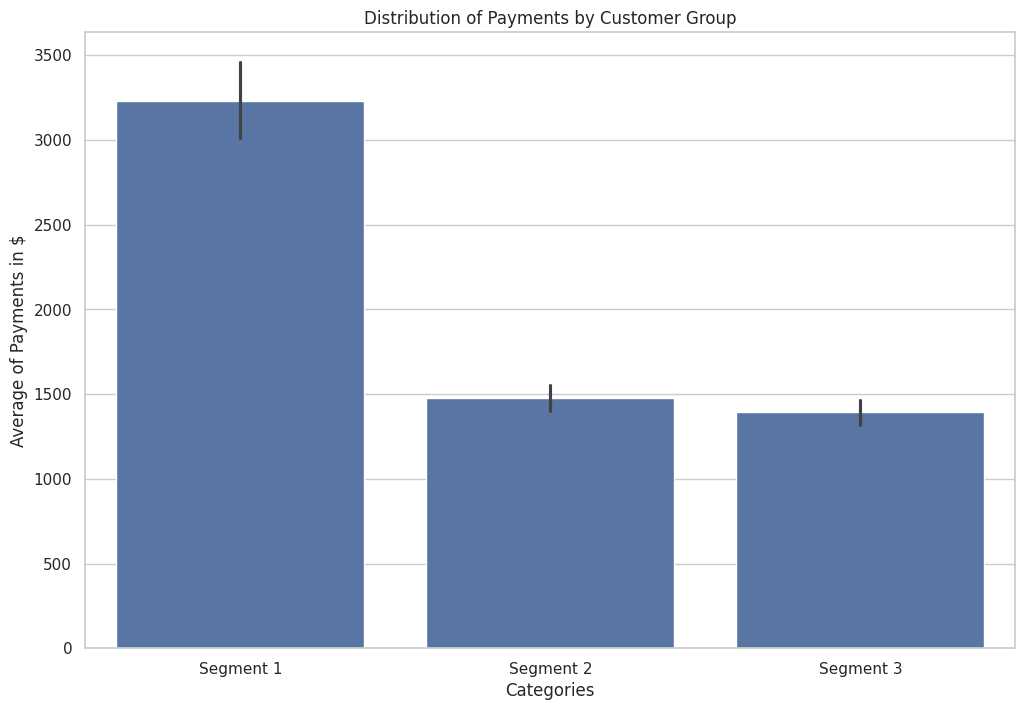

In [102]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='CUSTOMER_GROUP', y='PAYMENTS', data=df_joined)
plt.title('Distribution of Payments by Customer Group')
plt.xlabel('Categories')
plt.ylabel('Average of Payments in $')
ax.set_xticklabels(categories)
plt.show()

Ancora il Segment 1, osservando la media dei pagamenti, si conferma in linea con i dati precedentemente osservati.

<ipython-input-104-b1ffb7802e45>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories)


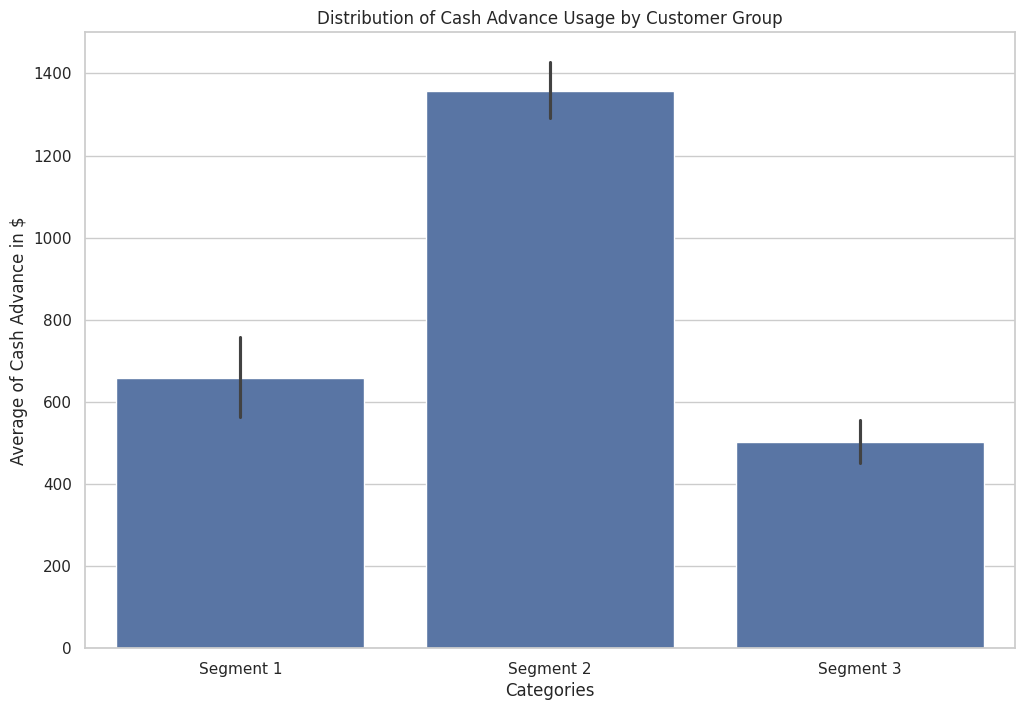

In [104]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='CUSTOMER_GROUP', y='CASH_ADVANCE', data=df_joined)
plt.title('Distribution of Cash Advance Usage by Customer Group')
plt.xlabel('Categories')
plt.ylabel('Average of Cash Advance in $')
ax.set_xticklabels(categories)
plt.show()

Per quanto riguarda l'anticipo di contanti effettuando un prelievo con la carta di credito, il Segment 2 si caratterizza per utilizzo più elevato di questa funzione

<ipython-input-105-157df29b1eac>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories)


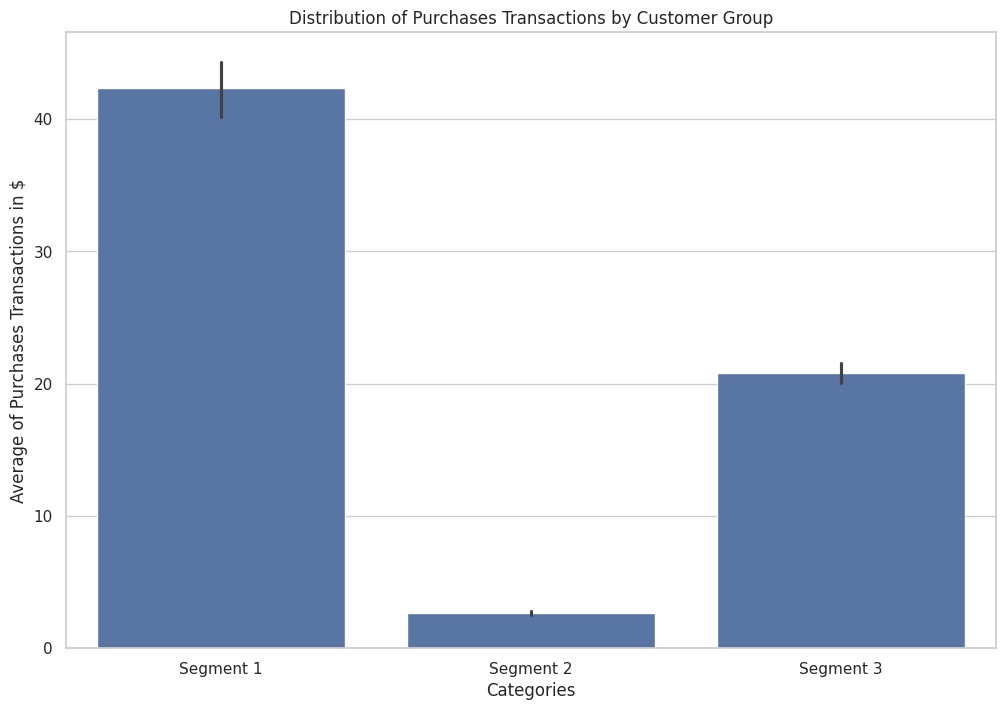

In [105]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='CUSTOMER_GROUP', y='PURCHASES_TRX', data=df_joined)
plt.title('Distribution of Purchases Transactions by Customer Group')
plt.xlabel('Categories')
plt.ylabel('Average of Purchases Transactions in $')
ax.set_xticklabels(categories)
plt.show()

Per quanto riguarda la media degli acquisti, questi vengono effettuati in misura maggiore dai clienti del segment 1

In [79]:
df_joined.groupby("CUSTOMER_GROUP")["TENURE"].mean()

CUSTOMER_GROUP
1    11.751906
2    11.446867
3    11.515271
Name: TENURE, dtype: float64

La media della durata del servizio di carta d credito è pressochè simile tra i tre gruppi, sicchè decido di non esplorare ulteriormente la feature.

In [87]:
installment=df_joined.groupby("CUSTOMER_GROUP")["INSTALLMENTS_PURCHASES"].mean()

<ipython-input-106-6324e69bc548>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.pointplot(x='CUSTOMER_GROUP', y='INSTALLMENTS_PURCHASES', data=df_joined, capsize=.2, palette="viridis")
<ipython-input-106-6324e69bc548>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories)


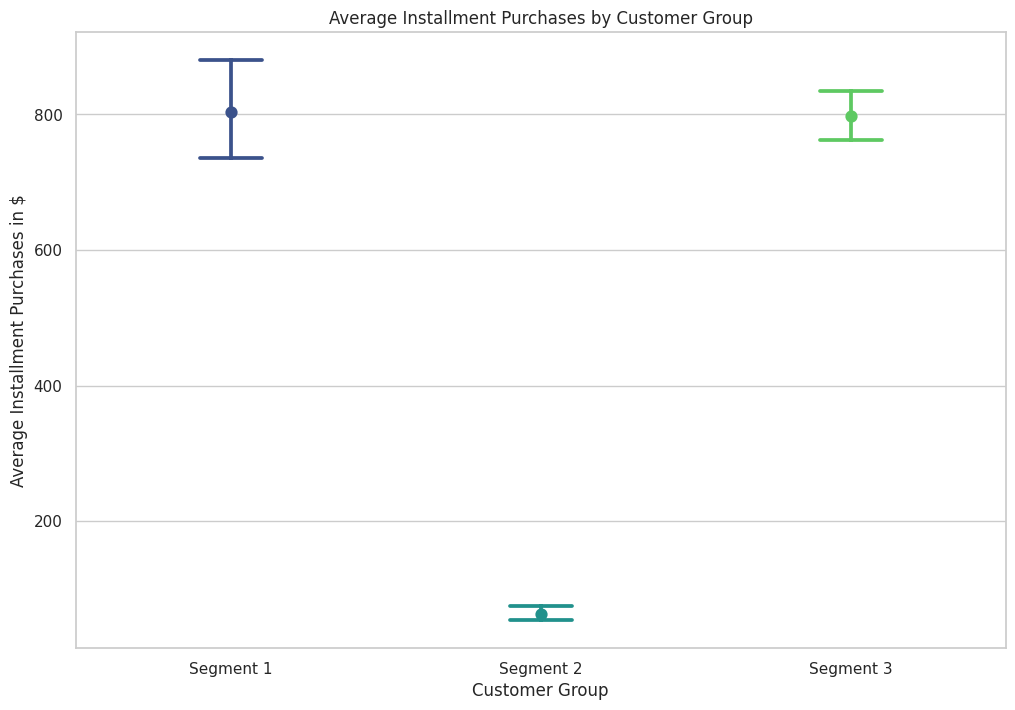

In [106]:
plt.figure(figsize=(12, 8))
ax=sns.pointplot(x='CUSTOMER_GROUP', y='INSTALLMENTS_PURCHASES', data=df_joined, capsize=.2, palette="viridis")
plt.title('Average Installment Purchases by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Average Installment Purchases in $')
ax.set_xticklabels(categories)
plt.show()

La media dei pagamenti rateali fornisce un'ulteriore evidenza negativa rispetto alla possibilità di indirizzare un'eventuale campagna di marketing sul Segment 2

**SEGMENT 1:** Si tratta di clienti avvezzi all'utilizzo delle carte di credito per effettuare pagamenti e che presentano una elevata affidabilità creditizia. Il plafond accordato è elevato e la banca può incassare commissioni elevate dall'utilizzo, indirizzando verso questi clienti azioni commerciali volte  a potenziarne la relazione e la fidelizzazione.

**SEGMENT 2:** Si tratta di clienti che preferiscono effettuare pagamenti in contanti e che utilizzano la carta di credito in via residuale rispetto agli strumenti tradizionali. Anche i pagamenti a rate confermano la tendenza e pertanto non sembra essere profittevole cercare di sviluppare questo genere di relazione

**SEGMENT 3:** Si tratta di clienti che utilizzano gli strumenti di pagamento per le spese quotidiane e che rateizzano all'occorrenza gli acquisti. Rappresentano un buon cluster di clientela che, tuttavia, non possiede una particolare raccolta. Vista la media del plafond accordato e l'utilizzo medio rilevato del servizio, è possibile incentivarne l'uso attraverso il lancio di una campagna premiante.